In [494]:
import os
data_dir='/media/bagrat/Новый том/Загрузки/kaggle/house-prices-advanced-regression-techniques'
fname=os.path.join(data_dir,'train.csv')
f=open(fname)
data=f.read()
lines=data.split('\n')
header=lines[0].split(',')
lines=lines[1:]
print(header)
print(lines[0])


['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [495]:
import pandas as pd
import numpy as np

In [496]:
df=pd.read_csv('/media/bagrat/Новый том/Загрузки/kaggle/house-prices-advanced-regression-techniques/train.csv')

In [497]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df=df.sort_index(axis=1)
df.shape


(1460, 81)

In [498]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [499]:
df=df.drop(['Electrical','Functional','GarageCond','GarageQual','Id','LandContour','LandSlope','MiscFeature',
        'MiscVal','PavedDrive','PoolArea','PoolQC','RoofMatl','ScreenPorch','Street','Utilities',],axis=1)

In [500]:
df.fillna(0)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,GarageArea,GarageCars,GarageFinish,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,RoofStyle,SaleCondition,SalePrice,SaleType,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,0,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,0,TA,Gd,VinylSd,VinylSd,0,0,0,PConc,2,548,2,RFn,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,Gd,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,2,CollgCr,61,5,7,Gable,Normal,208500,WD,8,856,0,2003,2003,2008
1,1262,0,0,0,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,0,TA,TA,MetalSd,MetalSd,0,TA,1,CBlock,2,460,2,RFn,Attchd,1976.0,1262,0,GasA,Ex,1Story,1,TA,9600,FR2,80.0,Reg,0,20,RL,0.0,None,5,Veenker,0,8,6,Gable,Normal,181500,WD,6,1262,298,1976,1976,2007
2,920,866,0,0,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,0,TA,Gd,VinylSd,VinylSd,0,TA,1,PConc,2,608,2,RFn,Attchd,2001.0,1786,1,GasA,Ex,2Story,1,Gd,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,9,CollgCr,42,5,7,Gable,Normal,223500,WD,6,920,0,2001,2002,2008
3,961,756,0,0,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,272,TA,TA,Wd Sdng,Wd Shng,0,Gd,1,BrkTil,1,642,3,Unf,Detchd,1998.0,1717,0,GasA,Gd,2Story,1,Gd,9550,Corner,60.0,IR1,0,70,RL,0.0,None,2,Crawfor,35,5,7,Gable,Abnorml,140000,WD,7,756,0,1915,1970,2006
4,1145,1053,0,0,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,0,TA,Gd,VinylSd,VinylSd,0,TA,1,PConc,2,836,3,RFn,Attchd,2000.0,2198,1,GasA,Ex,2Story,1,Gd,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,12,NoRidge,84,5,8,Gable,Normal,250000,WD,9,1145,192,2000,2000,2008
5,796,566,320,0,1,1Fam,TA,No,732,0,GLQ,Unf,1,0,Gd,64,Y,Norm,Norm,0,TA,TA,VinylSd,VinylSd,MnPrv,0,0,Wood,1,480,2,Unf,Attchd,1993.0,1362,1,GasA,Ex,1.5Fin,1,TA,14115,Inside,85.0,IR1,0,50,RL,0.0,None,10,Mitchel,30,5,5,Gable,Normal,143000,WD,5,796,40,1993,1995,2009
6,1694,0,0,0,3,1Fam,TA,Av,1369,0,GLQ,Unf,1,0,Ex,317,Y,Norm,Norm,0,TA,Gd,VinylSd,VinylSd,0,Gd,1,PConc,2,636,2,RFn,Attchd,2004.0,1694,0,GasA,Ex,1Story,1,Gd,10084,Inside,75.0,Reg,0,20,RL,186.0,Stone,8,Somerst,57,5,8,Gable,Normal,307000,WD,7,1686,255,2004,2005,2007
7,1107,983,0,0,3,1Fam,TA,Mn,859,32,ALQ,BLQ,1,0,Gd,216,Y,PosN,Norm,228,TA,TA,HdBoard,HdBoard,0,TA,2,CBlock,2,484,2,RFn,Attchd,1973.0,2090,1,GasA,Ex,2Story,1,TA,10382,Corner,0.0,IR1,0,60,RL,240.0,Stone,11,NWAmes,204,6,7,Gable,Normal,200000,WD,7,1107,235,1973,1973,2009
8,1022,752,0,0,2,1Fam,TA,No,0,0,Unf,Unf,0,0,TA,952,Y,Artery,Norm,205,TA,TA,BrkFace,Wd Shng,0,TA,2,BrkTil,2,468,2,Unf,Detchd,1931.0,1774,0,GasA,Gd,1.5Fin,2,TA,6120,Inside,51.0,Reg,0,50,RM,0.0,None,4,OldTown,0,5,7,Gable,Abnorml,129900,WD,8,952,90,1931,1950,2008
9,1077,0,0,0,2,2fmCon,TA,No,851,0,GLQ,Unf,1,0,TA,140,Y,Artery,Artery,0,TA,TA,MetalSd,MetalSd,0,TA,2,BrkTil,1,205,1,RFn,Attchd,1939.0,1077,0,GasA,Ex,1.5Unf,2,TA,7420,Corner,50.0,Reg,0,190,RL,0.0,None,1,BrkSide,4,6,5,Gable,Normal,118000,WD,5,991,0,1939,1950,2008


In [501]:
df=df.drop(['Alley','Fence','BldgType','3SsnPorch','BsmtCond','BsmtFinSF2','BsmtFinType2','BsmtHalfBath',
           'CentralAir','Condition1','Condition2','EnclosedPorch','Heating','KitchenAbvGr','LowQualFinSF'],axis=1)

In [502]:
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,GarageArea,GarageCars,GarageFinish,GarageType,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,HouseStyle,KitchenQual,LotArea,LotConfig,LotFrontage,LotShape,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,RoofStyle,SaleCondition,SalePrice,SaleType,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,3,No,706,GLQ,1,Gd,150,TA,Gd,VinylSd,VinylSd,NaN,0,PConc,2,548,2,RFn,Attchd,2003.0,1710,1,Ex,2Story,Gd,8450,Inside,65.0,Reg,60,RL,196.0,BrkFace,2,CollgCr,61,5,7,Gable,Normal,208500,WD,8,856,0,2003,2003,2008
1,1262,0,3,Gd,978,ALQ,0,Gd,284,TA,TA,MetalSd,MetalSd,TA,1,CBlock,2,460,2,RFn,Attchd,1976.0,1262,0,Ex,1Story,TA,9600,FR2,80.0,Reg,20,RL,0.0,None,5,Veenker,0,8,6,Gable,Normal,181500,WD,6,1262,298,1976,1976,2007
2,920,866,3,Mn,486,GLQ,1,Gd,434,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,608,2,RFn,Attchd,2001.0,1786,1,Ex,2Story,Gd,11250,Inside,68.0,IR1,60,RL,162.0,BrkFace,9,CollgCr,42,5,7,Gable,Normal,223500,WD,6,920,0,2001,2002,2008
3,961,756,3,No,216,ALQ,1,TA,540,TA,TA,Wd Sdng,Wd Shng,Gd,1,BrkTil,1,642,3,Unf,Detchd,1998.0,1717,0,Gd,2Story,Gd,9550,Corner,60.0,IR1,70,RL,0.0,None,2,Crawfor,35,5,7,Gable,Abnorml,140000,WD,7,756,0,1915,1970,2006
4,1145,1053,4,Av,655,GLQ,1,Gd,490,TA,Gd,VinylSd,VinylSd,TA,1,PConc,2,836,3,RFn,Attchd,2000.0,2198,1,Ex,2Story,Gd,14260,FR2,84.0,IR1,60,RL,350.0,BrkFace,12,NoRidge,84,5,8,Gable,Normal,250000,WD,9,1145,192,2000,2000,2008
5,796,566,1,No,732,GLQ,1,Gd,64,TA,TA,VinylSd,VinylSd,NaN,0,Wood,1,480,2,Unf,Attchd,1993.0,1362,1,Ex,1.5Fin,TA,14115,Inside,85.0,IR1,50,RL,0.0,None,10,Mitchel,30,5,5,Gable,Normal,143000,WD,5,796,40,1993,1995,2009
6,1694,0,3,Av,1369,GLQ,1,Ex,317,TA,Gd,VinylSd,VinylSd,Gd,1,PConc,2,636,2,RFn,Attchd,2004.0,1694,0,Ex,1Story,Gd,10084,Inside,75.0,Reg,20,RL,186.0,Stone,8,Somerst,57,5,8,Gable,Normal,307000,WD,7,1686,255,2004,2005,2007
7,1107,983,3,Mn,859,ALQ,1,Gd,216,TA,TA,HdBoard,HdBoard,TA,2,CBlock,2,484,2,RFn,Attchd,1973.0,2090,1,Ex,2Story,TA,10382,Corner,NaN,IR1,60,RL,240.0,Stone,11,NWAmes,204,6,7,Gable,Normal,200000,WD,7,1107,235,1973,1973,2009
8,1022,752,2,No,0,Unf,0,TA,952,TA,TA,BrkFace,Wd Shng,TA,2,BrkTil,2,468,2,Unf,Detchd,1931.0,1774,0,Gd,1.5Fin,TA,6120,Inside,51.0,Reg,50,RM,0.0,None,4,OldTown,0,5,7,Gable,Abnorml,129900,WD,8,952,90,1931,1950,2008
9,1077,0,2,No,851,GLQ,1,TA,140,TA,TA,MetalSd,MetalSd,TA,2,BrkTil,1,205,1,RFn,Attchd,1939.0,1077,0,Ex,1.5Unf,TA,7420,Corner,50.0,Reg,190,RL,0.0,None,1,BrkSide,4,6,5,Gable,Normal,118000,WD,5,991,0,1939,1950,2008


In [503]:
cat_columns=df.select_dtypes('object').columns
for column in cat_columns:
    df[column]=df[column].astype('category')

In [504]:
df.select_dtypes('category').columns

Index(['BsmtExposure', 'BsmtFinType1', 'BsmtQual', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Foundation',
       'GarageFinish', 'GarageType', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'Neighborhood',
       'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')

In [505]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
BedroomAbvGr     1460 non-null int64
BsmtExposure     1460 non-null int8
BsmtFinSF1       1460 non-null int64
BsmtFinType1     1460 non-null int8
BsmtFullBath     1460 non-null int64
BsmtQual         1460 non-null int8
BsmtUnfSF        1460 non-null int64
ExterCond        1460 non-null int8
ExterQual        1460 non-null int8
Exterior1st      1460 non-null int8
Exterior2nd      1460 non-null int8
FireplaceQu      1460 non-null int8
Fireplaces       1460 non-null int64
Foundation       1460 non-null int8
FullBath         1460 non-null int64
GarageArea       1460 non-null int64
GarageCars       1460 non-null int64
GarageFinish     1460 non-null int8
GarageType       1460 non-null int8
GarageYrBlt      1379 non-null float64
GrLivArea        1460 non-null int64
HalfBath         1460 non-null int64
HeatingQC     

In [507]:
y_train=list(df['SalePrice'])
y_train[0]


208500

In [508]:
int_columns=df.select_dtypes('int64').columns
for column in int_columns:
    mean=df[column].mean(axis=0)
    df[column]-=mean
    std=df[column].std(axis=0)
    df[column]/=std



In [512]:
x_train=np.array(df.drop(['SalePrice'],axis=1))
x_train[0]
df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtFullBath,BsmtQual,BsmtUnfSF,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,GarageArea,GarageCars,GarageFinish,GarageType,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,HouseStyle,KitchenQual,LotArea,LotConfig,LotFrontage,LotShape,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,RoofStyle,SaleCondition,SalePrice,SaleType,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.793162,1.161454,0.163723,3,0.575228,2,1.107431,2,-0.944267,4,2,12,13,-1,-0.950901,2,0.789470,0.350880,0.311618,1,1,2003.0,0.370207,1.227165,0,5,2,-0.207071,4,65.0,3,0.073350,3,196.0,1,-1.598563,5,0.216429,-0.517023,0.651256,1,4,0.347154,8,0.911897,-0.459145,-0.751918,1.050634,0.878367,0.138730
1,0.257052,-0.794891,0.163723,1,1.171591,0,-0.819684,2,-0.641008,4,3,8,8,4,0.600289,1,0.789470,-0.060710,0.311618,1,1,1976.0,-0.482347,-0.761360,0,2,3,-0.091855,2,80.0,3,-0.872264,3,0.0,2,-0.488943,24,-0.704242,2.178881,-0.071812,1,4,0.007286,8,-0.318574,0.466305,1.625638,0.156680,-0.429430,-0.614228
2,-0.627611,1.188943,0.163723,2,0.092875,2,1.107431,2,-0.301540,4,2,12,13,4,0.600289,2,0.789470,0.631510,0.311618,1,1,2001.0,0.514836,1.227165,0,5,2,0.073455,4,68.0,0,0.073350,3,162.0,1,0.990552,5,-0.070337,-0.517023,0.651256,1,4,0.535970,8,-0.318574,-0.313261,-0.751918,0.984415,0.829930,0.138730
3,-0.521555,0.936955,0.163723,3,-0.499103,0,1.107431,3,-0.061648,4,3,13,15,2,0.600289,0,-1.025689,0.790533,1.649742,2,5,1998.0,0.383528,-0.761360,2,5,2,-0.096864,0,60.0,0,0.309753,3,0.0,2,-1.598563,6,-0.175988,-0.517023,0.651256,1,0,-0.515105,8,0.296662,-0.687089,-0.751918,-1.862993,-0.720051,-1.367186
4,-0.045596,1.617323,1.389547,0,0.463410,2,1.107431,2,-0.174805,4,2,12,13,4,0.600289,2,0.789470,1.697903,1.649742,1,1,2000.0,1.298881,1.227165,0,5,2,0.375020,2,84.0,0,0.073350,3,350.0,1,2.100173,15,0.563567,-0.517023,1.374324,1,4,0.869545,8,1.527133,0.199611,0.779930,0.951306,0.733056,0.138730
5,-0.948366,0.501703,-2.287924,3,0.632233,2,1.107431,2,-1.138896,4,3,12,13,-1,-0.950901,5,-1.025689,0.032833,0.311618,2,1,1993.0,-0.292045,1.227165,0,0,3,0.360493,4,85.0,0,-0.163054,3,0.0,2,1.360426,11,-0.251453,-0.517023,-0.794879,1,4,-0.477341,8,-0.933810,-0.595911,-0.432783,0.719540,0.490872,0.891688
6,1.374522,-0.794891,0.163723,0,2.028862,2,1.107431,0,-0.566325,4,2,12,13,2,0.600289,2,0.789470,0.762470,0.311618,1,1,2004.0,0.339758,-0.761360,0,2,2,-0.043364,4,75.0,3,-0.872264,3,186.0,3,0.620678,21,0.156057,-0.517023,1.374324,1,4,1.587045,8,0.296662,1.432785,1.282568,1.083743,0.975241,-0.614228
7,-0.143892,1.456967,0.163723,2,0.910682,0,1.107431,2,-0.794901,4,3,6,6,4,2.151479,1,0.789470,0.051542,0.311618,1,1,1973.0,1.093354,1.227165,0,5,3,-0.013508,0,NaN,0,0.073350,3,240.0,3,1.730299,14,2.374723,0.381612,0.651256,1,4,0.240159,8,0.296662,0.112993,1.123000,0.057352,-0.574741,0.891688
8,-0.363764,0.927792,-1.062101,3,-0.972685,5,-0.819684,3,0.870759,4,3,3,15,4,2.151479,0,0.789470,-0.023293,0.311618,2,5,1931.0,0.492000,-0.761360,2,0,3,-0.440508,4,51.0,3,-0.163054,4,0.0,2,-0.858816,17,-0.704242,-0.517023,0.651256,1,0,-0.642241,8,0.911897,-0.240320,-0.033864,-1.333243,-1.688790,0.138730
9,-0.221494,-0.794891,-1.062101,3,0.893142,2,1.107431,3,-0.966898,4,3,8,8,4,2.151479,0,-1.025689,-1.253387,-1.026506,1,1,1939.0,-0.834405,-0.761360,0,1,3,-0.310264,0,50.0,3,3.146594,3,0.0,2,-1.968437,3,-0.643870,0.381612,-0.794879,1,4,-0.792034,8,-0.933810,-0.151422,-0.751918,-1.068368,-1.688790,0.138730


In [513]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(512,activation='relu',
         input_shape=(x_train.shape[1],)))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


In [514]:
model.fit(x_train,y_train,validation_split=0.2,epochs=200,batch_size=1)

Train on 1168 samples, validate on 292 samples
Epoch 1/200
1168/1168 [==============================] - 5s 5ms/step - loss: 19572999374.9008 - mean_absolute_error: 109430.9553 - val_loss: 6878816429.8775 - val_mean_absolute_error: 55473.7648
Epoch 2/200
1168/1168 [==============================] - 4s 3ms/step - loss: 6283615510.0410 - mean_absolute_error: 57002.5409 - val_loss: 6839552662.0258 - val_mean_absolute_error: 55574.9478
Epoch 3/200
1168/1168 [==============================] - 4s 3ms/step - loss: 6288650566.7682 - mean_absolute_error: 56933.9015 - val_loss: 6712476616.4328 - val_mean_absolute_error: 56765.1281
Epoch 4/200
1168/1168 [==============================] - 4s 3ms/step - loss: 6270636132.1445 - mean_absolute_error: 57082.2454 - val_loss: 6716776683.7828 - val_mean_absolute_error: 58263.7842
Epoch 5/200
 415/1168 [=========>....................] - ETA: 2s - loss: 6118622939.7928 - mean_absolute_error: 57169.3907

KeyboardInterrupt: 

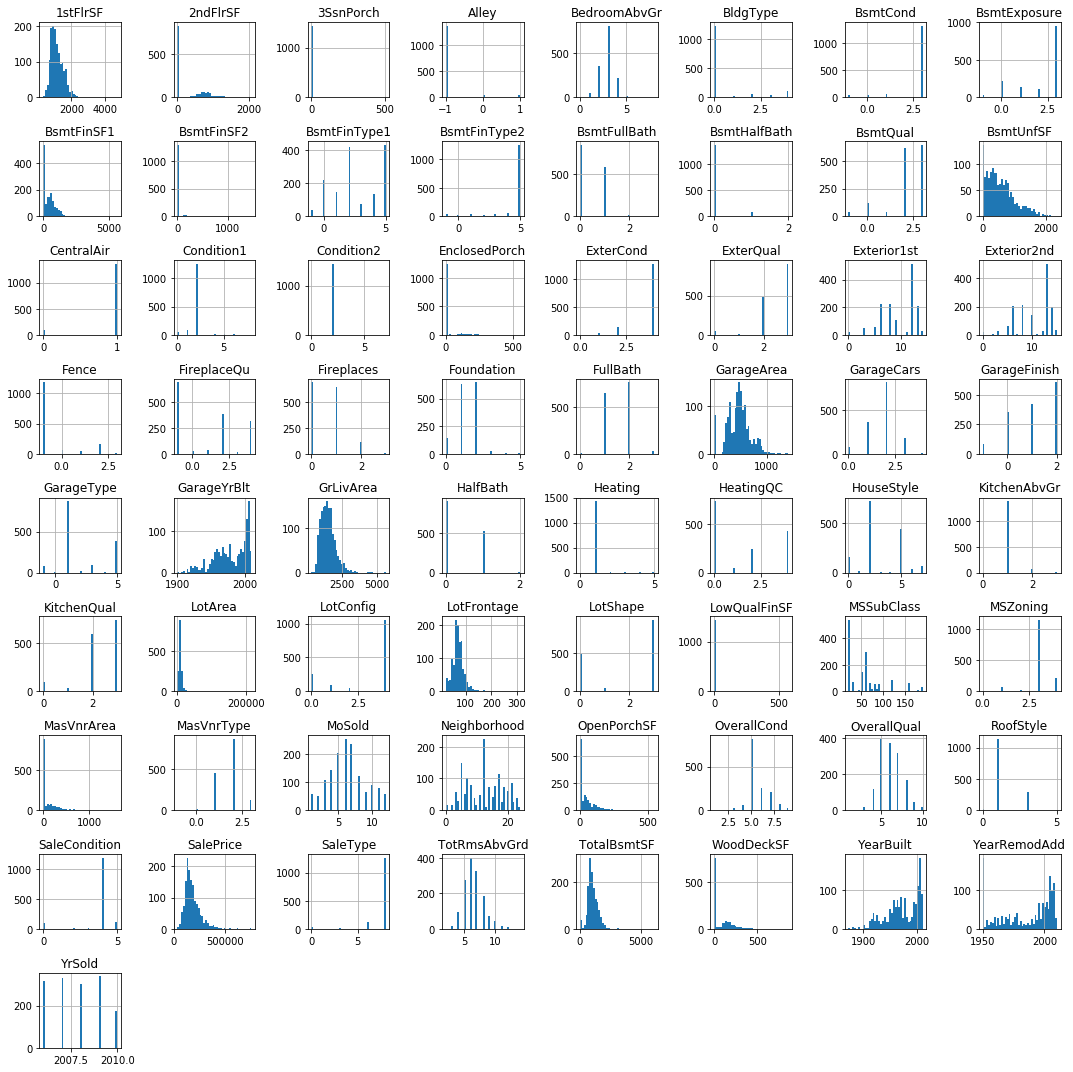

In [237]:
from matplotlib import pyplot as plt
df.hist(figsize = (15, 15), bins = 40)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Skew of Variables')

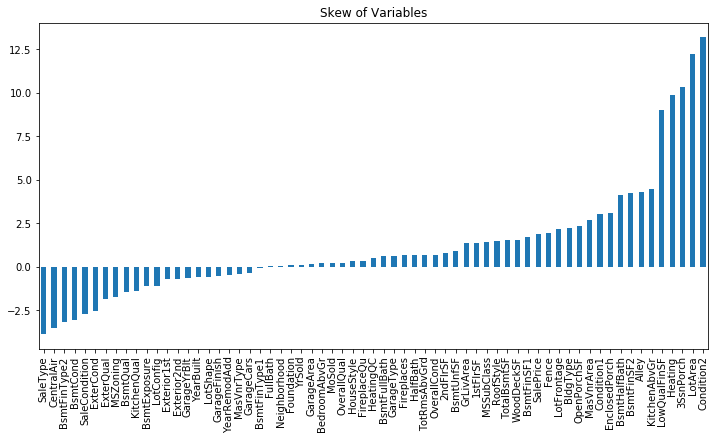

In [238]:
plt.figure(figsize = (12, 6))
df.skew().sort_values().plot(kind = 'bar', color = 'C0')
plt.title('Skew of Variables')

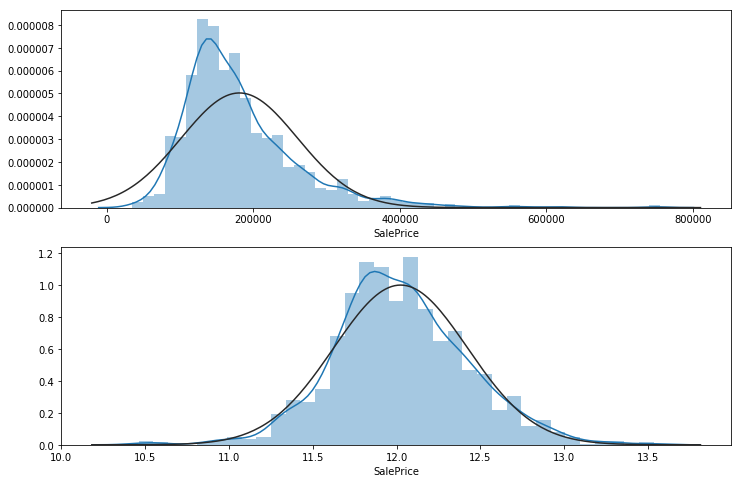

In [239]:
from scipy.stats import norm
import seaborn as sns
fig, ax = plt.subplots(2, 1, figsize = (12, 8)) 

sns.distplot(df['SalePrice'], fit = norm, ax = ax[0])
sns.distplot(np.log(df['SalePrice']), fit = norm, ax = ax[1])
plt.show()

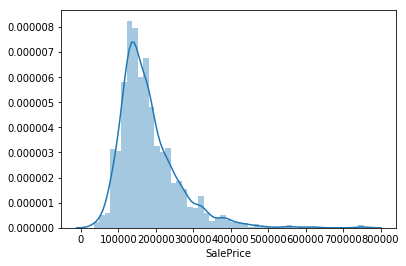

In [25]:
sns.distplot(df.SalePrice)

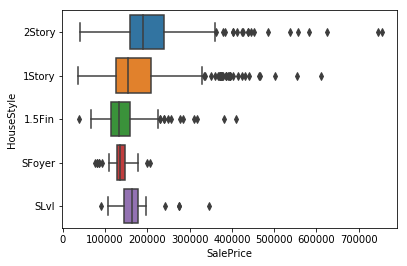

In [26]:
HouseStyle = df.HouseStyle.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="HouseStyle", x="SalePrice", data=df[df.HouseStyle.isin(HouseStyle)], orient="h")

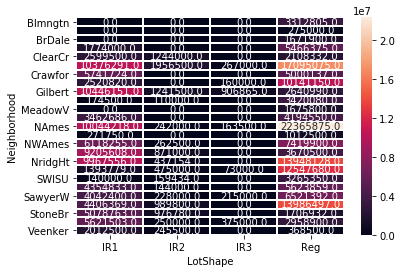

In [27]:
Neighborhood_LotShape_SalePrice = df.pivot_table(
                        index='Neighborhood', 
                        columns='LotShape', 
                        values='SalePrice', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(Neighborhood_LotShape_SalePrice, annot=True, fmt=".1f", linewidths=1)